In [1]:
import cv2
import numpy as np
from PIL import Image
from glob import glob
import skimage
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)
import matplotlib.pyplot as plt

In [2]:
targetPath = "Result/Unet2_lvl12_normal/predict_output/Round5/result_test/"
savePath = "Result/Unet2_lvl12_normal/opening-closing/Round5/"

In [3]:
target = glob(targetPath + '*.png')
len(target)

109

In [4]:
def flood_fill(img):

    
    im_th = img.copy()

    # Copy the thresholded image.
    im_floodfill = im_th.copy()

    # Mask used to flood filling.
     # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
#     print(h,w)
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv
    
    return im_out

In [7]:
for item in target :
    img = Image.open(item)
    
    img = img.convert('L')
    img = np.array(img)
    
#     print(img.shape)
#     temp = img[:,:,1]
    
#     img = np.asarray(img).astype(np.bool)
#     img = np.asarray(img).astype(np.int) * 255
    
#     print(np.max(img))
#     print(np.min(img))
#     print(np.average(img))
#     plt.imshow(img)
#     print(type(img))
    img = np.uint8(img)

#     print(img.shape)
    
    imgName = item[item.find("/T1") + 1 : -4]
    
#     img = flood_fill(img)
    kernel = np.ones((3,3),np.uint8)
    kernel_o = disk(2)
    
    dilation = cv2.dilate(img,kernel_o,iterations = 1)
    dilation = cv2.dilate(dilation,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel_o,iterations = 1)
    erosion = cv2.erode(erosion,kernel_o,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 1)
    
    img = Image.fromarray(img.astype(np.uint8))
    img.save(savePath + imgName + '.png' , 'PNG')
    

In [21]:
kernel = np.ones((3,3),np.uint8)
kernel_o = disk(2)

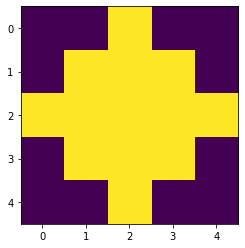

In [23]:
plt.imshow(kernel_o)